In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("bank_note_data.csv")
df = pd.DataFrame(df)
df.head(5)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:xlabel='Class', ylabel='count'>

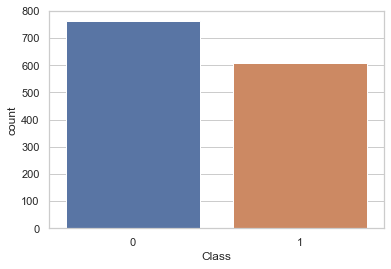

In [3]:
sns.set(style="whitegrid", font_scale=1)
sns.countplot(data=df,x="Class")

In [4]:
correlation = df.corr()
display(correlation)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
Image.Var,1.000000,0.264026,-0.380850,0.276817,-0.724843
Image.Skew,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Image.Curt,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


[Text(0.5, 1.0, 'CORRELATION BETWEEN DATA')]

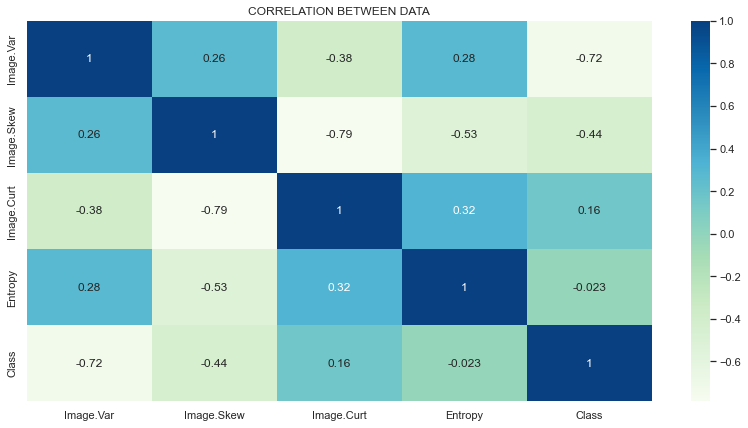

In [5]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize = (14,7))
corr_map = sns.heatmap(correlation,cmap="GnBu",annot=True)
corr_map.set(title ='CORRELATION BETWEEN DATA')

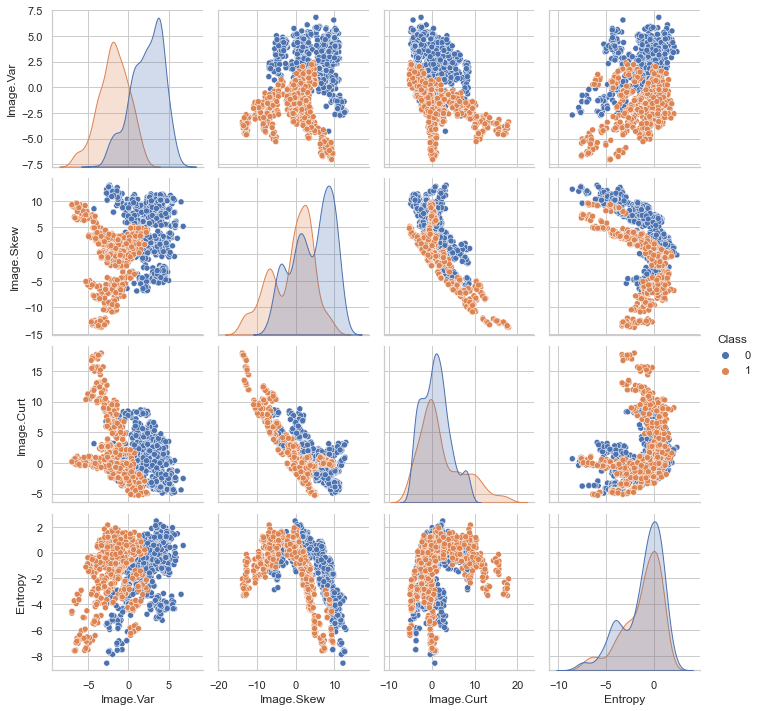

In [6]:
sns.pairplot(data=df, hue="Class")

In [7]:
columns = list(df.columns)
columns.remove('Class')

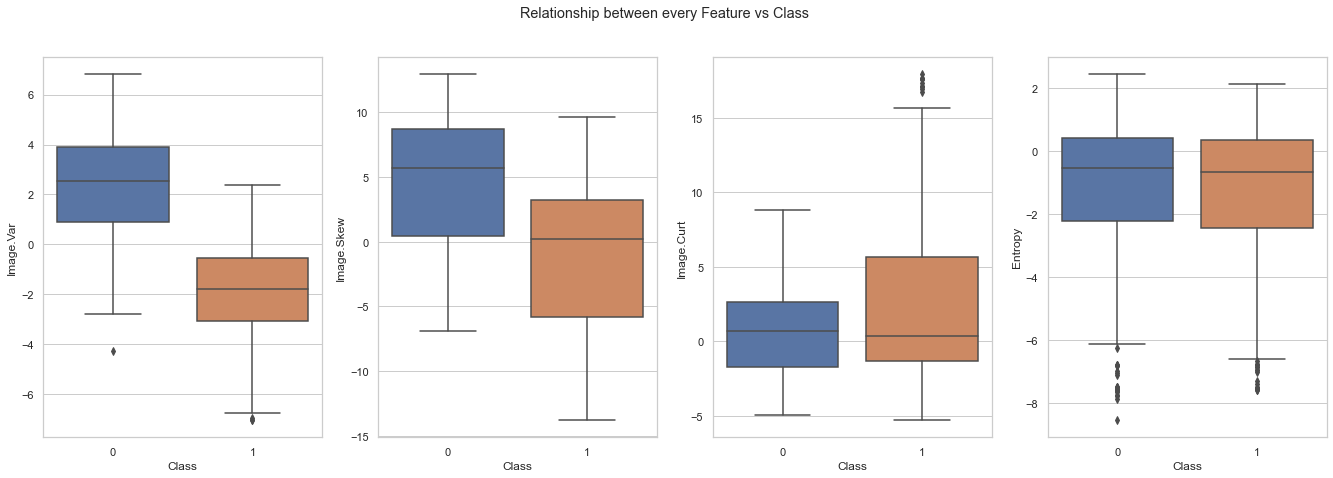

In [8]:
sns.set(style="whitegrid", font_scale=1)
fig, ax = plt.subplots(ncols= 4,figsize=(23, 7))
fig.suptitle("Relationship between every Feature vs Class")
for index, column in enumerate(columns):
    sns.boxplot(x='Class',y=column,data=df,ax=ax[index])

In [9]:
X_features =  df.iloc[:, :-1].values
y_features =  df.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.30, random_state=42)

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [14]:
ann_log = model.fit(X_train, y_train, batch_size = 32, epochs = 50,validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 1s 9ms/step - loss: 0.6879 - accuracy: 0.4521 - val_loss: 0.6710 - val_accuracy: 0.5267
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5542 - val_loss: 0.6411 - val_accuracy: 0.6189
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.6094 - val_loss: 0.6115 - val_accuracy: 0.6529
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7146 - val_loss: 0.5804 - val_accuracy: 0.7621
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7875 - val_loss: 0.5464 - val_accuracy: 0.7985
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8094 - val_loss: 0.5092 - val_accuracy: 0.8204
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.8344 - val_loss: 0.4687 - val_accuracy: 0.8301
Epoch 8/50
30/30 [==

In [15]:
pred = model.predict(X_test)

13/13 [==============================] - 0s 666us/step


In [16]:
evaluation = model.evaluate(X_test,y_test)
print('Accuracy:',evaluation)

13/13 [==============================] - 0s 914us/step - loss: 0.0247 - accuracy: 0.9976
Accuracy: [0.02474602498114109, 0.9975728392601013]


In [17]:
acc = ann_log.history['accuracy']
val_acc = ann_log.history['val_accuracy']

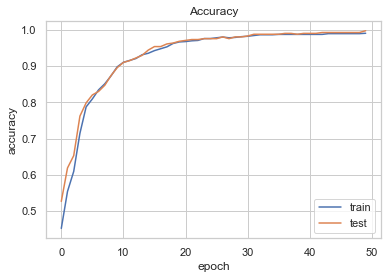

In [18]:
sns.set(style="whitegrid", font_scale=1)
fig = plt.figure()
plt.subplot(1,1,1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

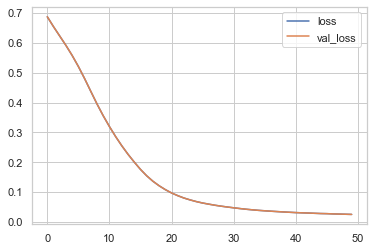

In [19]:
plt.plot(ann_log.history['loss'], label='loss')
plt.plot(ann_log.history['loss'], label='val_loss')
plt.legend()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_test)
y_pred=np.rint(pred).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:%1.3f' % accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

13/13 [==============================] - 0s 751us/step
Accuracy:0.998
[[229   0]
 [  1 182]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

